In [1]:
%matplotlib inline
import localgroup
import triangle
import sklearn
from sklearn import mixture
import numpy as np
import pickle
import matplotlib.patches as mpatches

In [2]:
save_path = "/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/final_scripts/"
Lfile = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/L.pickle'
Trfile = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/Tr.pickle'
gmm_sample_file1 = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/GMMsample1.bin'
gmm_sample_file2 = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/GMMsample2.bin'

with open(Lfile, 'rb') as Lf:
    L = pickle.load(Lf)

with open(Trfile, 'rb') as Trf:
    Tr = pickle.load(Trf)

with open(gmm_sample_file1, 'rb') as f:
    samples1 = pickle.load(f)
    
with open(gmm_sample_file2, 'rb') as g:
    samples2 = pickle.load(g)

In [3]:
r1, c1 = samples1.shape
r2, c2 = samples2.shape
samples1.resize((r1+r2, c1))
samples1[r1:] = samples2
Tr.GMM_sample(1, L, reps=1, simple=True)
Tr.gmm_samples = samples1


In [4]:
gmm_MW = np.copy(Tr.gmm_samples[:,10])
gmm_M31 = np.copy(Tr.gmm_samples[:,9])
gmm_M33 = np.copy(Tr.gmm_samples[:,11])
gmm_LMC = np.copy(Tr.gmm_samples[:,12])

gmm_MW_C = np.copy(Tr.gmm_samples[:,14])
gmm_M31_C = np.copy(Tr.gmm_samples[:,13])
gmm_LG = np.log10(np.power(10,gmm_MW) + np.power(10,gmm_M31))
f = np.power(10,gmm_LMC)/np.power(10, gmm_MW)
Tr.gmm_samples = Tr.gmm_samples[:,0:9]

In [5]:
Tr.compute_model_weights(L, 'gmm', normalize=True)
with open('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/QGMM_samp_weights.pickle', 'wb') as f:
    pickle.dump(Tr.weights, f)
    

Quantiles:
[(0.16, 11.756381644624105), (0.5, 11.936547563430617), (0.84, 12.064363940790765)]
Quantiles:
[(0.16, 11.944306734017806), (0.5, 12.10881840044151), (0.84, 12.299798840818077)]
Quantiles:
[(0.16, 10.853290846152772), (0.5, 11.227275265970933), (0.84, 11.518240134253032)]
Quantiles:
[(0.16, 10.844515655046427), (0.5, 11.096681955125414), (0.84, 11.303771115715804)]
Quantiles:
[(0.16, 12.175510475048348), (0.5, 12.322477634684017), (0.84, 12.48032878581957)]


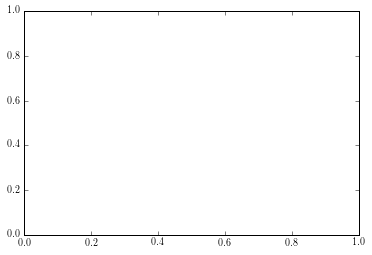

In [24]:
labs = ["$Mvir_{MW}$", "$Mvir_{M31}$", "$Mvir_{M33}$", "$Mvir_{LMC}$", "$Mvir_{LG}$"]
all_mvir = np.transpose(np.vstack((gmm_MW, gmm_M31, gmm_M33, gmm_LMC, gmm_LG)))
figure = triangle.corner(all_mvir, labels=labs, quantiles=[0.16,0.5,0.84], fig=figure_P, weights=Tr.weights, plot_contours=True, show_titles=True, title_args={"fontsize": 16}, label_args={"fontsize": 16}, plot_datapoints=False, bins=20, color='g')



In [7]:
save_path_P = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/working_plots/pair/02/'

L_P = localgroup.Likelihood(isPair=True)
L_P.generate(Nsamples=200000)

L_P.set_PDF(mixture.GMM(n_components=10, covariance_type='full'))
L_P.approximate()

Inside method: heliocentric_equatorial_spherical_to_galactocentric_cartesian
l =  [ 121.14533836  121.21548563  121.13348054 ...,  121.22726699  121.18462672
  121.15224819]
b =  [-21.55361895 -21.55289133 -21.49645697 ..., -21.56793948 -21.6050269
 -21.64384482]
mu_l = 122.597187 +/- 30.781449
mu_b = -78.323914 +/- 28.433857
v_west:  -122.597187 +/- 30.781449
v_north: -78.323914 +/- 28.433857


/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/localgroup/halo.py:134: RuntimeWarning: invalid value encountered in divide
  self.v_r = (self.x*self.vx + self.y*self.vy + self.z*self.vz)/self.D


sim_sample length before:  (200000, 3)
sim_sample length after:  (199366, 3)


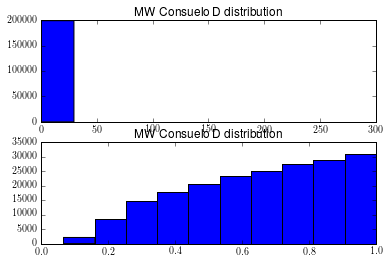

In [9]:
path_P = '/afs/slac.stanford.edu/u/ki/mwillia1/All_Boxes_dat_M31_larger.npy'
npoints = 200000
halo_props = ['MW_Mvir', 'M31_Mvir', 'M33_Mvir']

Tr_P = localgroup.Triplet(isPair=True)
Tr_P.read_sim_points(path_P, npoints, halo_props, h=0.7, a=1.0, npy=True)

Tr_P.transform_to_M31(sim=True)

Tr_P.dist_filter((Tr_P.sim_samples[:,0] < 10))

Tr_P.preprocess(L_P.samples_means, L_P.samples_stds, mode='sim')

In [11]:
dat_P = np.transpose(np.vstack((np.transpose(Tr_P.sim_samples), np.log10(Tr_P.M31.Mvir), np.log10(Tr_P.MW.Mvir))))
Tr_P.GMM(20, dat_P)

In [12]:
Tr_P.GMM_sample(10000000, L_P, reps=1, simple=False)

#path = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/Tr_P_samp.pickle'
#with open(save_path, 'wb') as f:
#    pickle.dump(Tr.gmm_samples, f)

gmm_MW_P = np.copy(Tr_P.gmm_samples[:,4])
gmm_M31_P = np.copy(Tr_P.gmm_samples[:,3])
gmm_LG_P = np.log10(np.power(10,gmm_MW_P) + np.power(10,gmm_M31_P))

Tr_P.gmm_samples = Tr_P.gmm_samples[:,0:3]

Tr_P.compute_model_weights(L_P, 'gmm')


returned gmm_sample size is:  (50259, 5)


In [13]:
count, smallest_weight = Tr_P.calculate_N95(filter_samples=False)
print "N95 ", count

N95  37337


In [14]:
holder = np.zeros(gmm_LG_P.shape[0])
holder[0]=1

In [16]:
holder.shape

(50259,)

In [18]:
gmm_LG_P.shape

(50259,)

In [19]:
all_mvir = np.transpose(np.vstack((gmm_MW_P, gmm_M31_P, holder, holder, gmm_LG_P)))

Quantiles:
[(0.16, 11.372024923844405), (0.5, 11.7193741536319), (0.84, 12.067784086914022)]
Quantiles:
[(0.16, 11.791465099326192), (0.5, 12.192674182789396), (0.84, 12.48868609022706)]
Quantiles:
[(0.16, 0.0), (0.5, 0.0), (0.84, 0.0)]
Quantiles:
[(0.16, 0.0), (0.5, 0.0), (0.84, 0.0)]
Quantiles:
[(0.16, 11.996447386364045), (0.5, 12.34475599726309), (0.84, 12.614974493715561)]


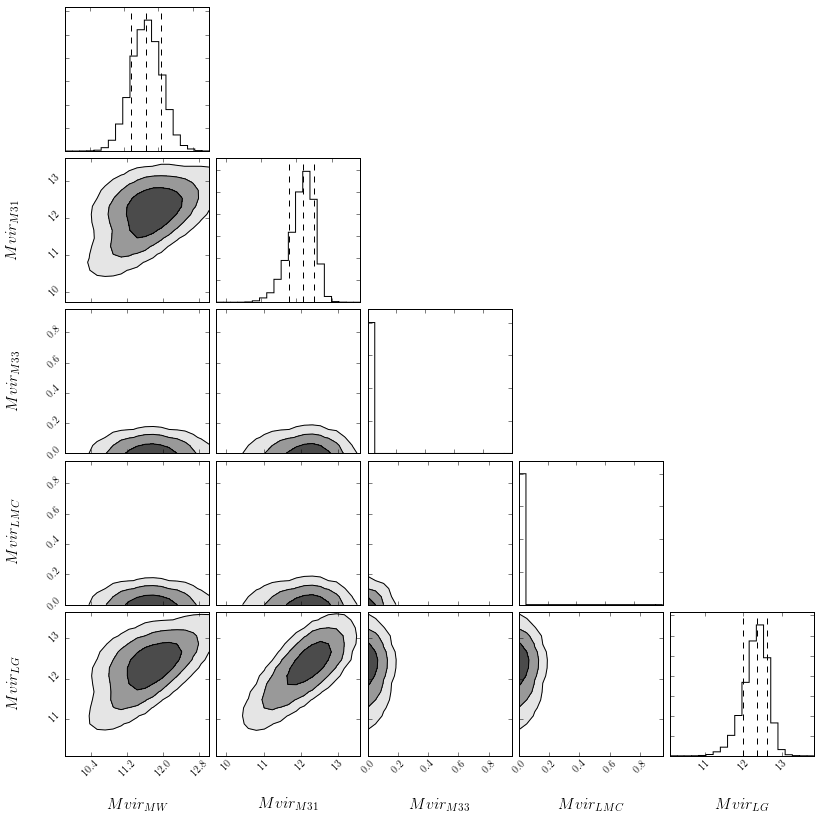

In [23]:
#labs = ["$Mvir_{MW}$", "$Mvir_{M31}$", "$Mvir_{LG}$"]


figure_P = triangle.corner(all_mvir, labels=labs, quantiles=[0.16,0.5,0.84], fig=None, weights=Tr_P.weights, plot_contours=True, show_titles=False, title_args={"fontsize": 16}, label_args={"fontsize": 16}, plot_datapoints=False, bins=20, color='k')
#figure.savefig(save_path+'P_GMMP_all_Mvir.pdf', dpi=800)

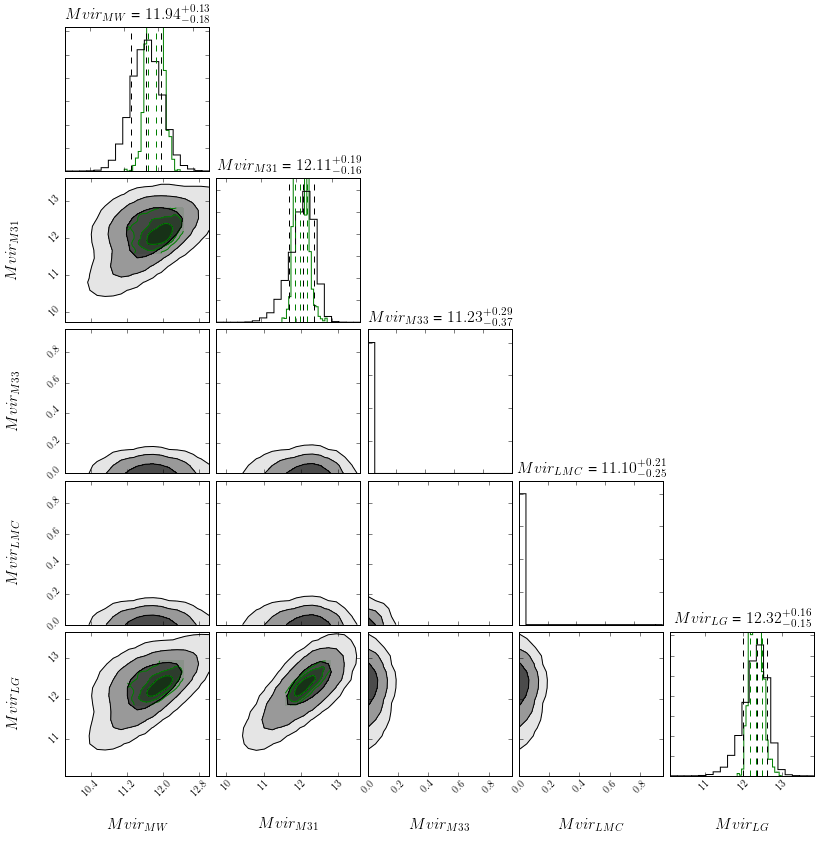

In [22]:
figure

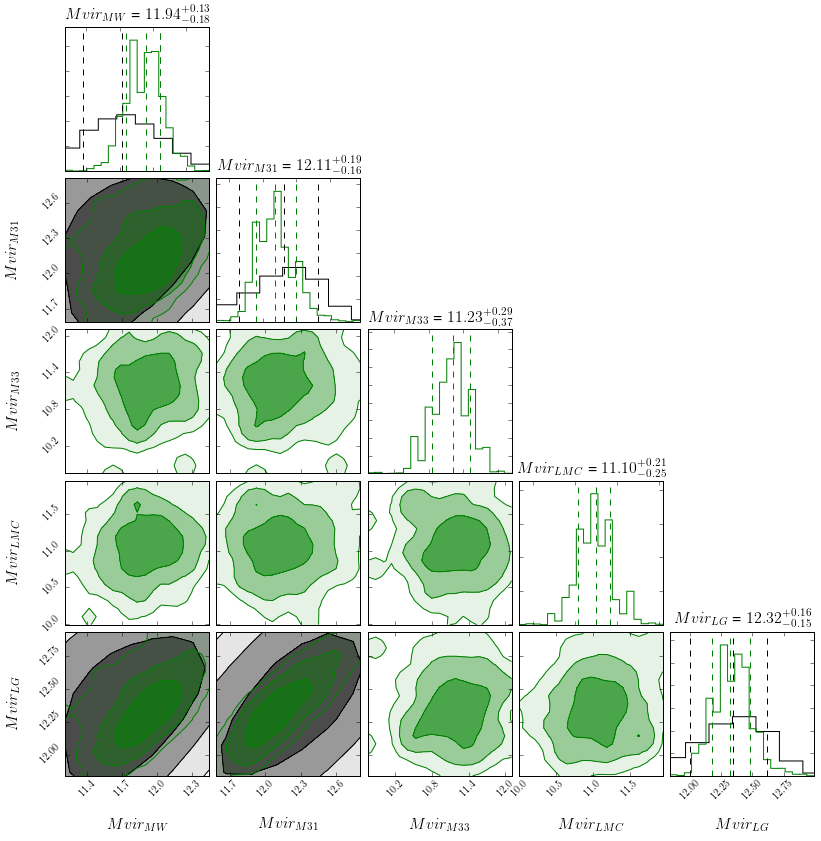

In [25]:
figure_P

In [26]:
figure_P.savefig(save_path+'Q_GMMP_all_Mvir_P_overlap.pdf', dpi=800)